In [1]:
import pandas as pd
import sys 
import os 
# Add the parent directory to the Python path 
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.data_cleaning import get_xdr_data, clean_xdr_data


In [2]:
# Get data from PostgreSQL
df = get_xdr_data()

# Clean the data
df_cleaned = clean_xdr_data(df)

# Display the cleaned data
df_cleaned.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.31144834608449e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201448079117.0,33664962239.0,35521209507511.0,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.31144834828789e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208201909211140.0,33681854413.0,35794009006359.0,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.31144834840805e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200314458056.0,33760627129.0,35281510359387.0,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.31144834854428e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201402342131.0,33750343200.0,35356610164913.0,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.31144834994807e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201401415120.0,33699795932.0,35407009745539.0,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
# Aggregate per user
user_aggregate = df_cleaned.groupby('IMSI').agg(
    num_xdr_sessions=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_dl_data=('Total DL (Bytes)', 'sum'),
    total_ul_data=('Total UL (Bytes)', 'sum'),
    total_social_media_dl=('Social Media DL (Bytes)', 'sum'),
    total_social_media_ul=('Social Media UL (Bytes)', 'sum'),
    total_youtube_dl=('Youtube DL (Bytes)', 'sum'),
    total_youtube_ul=('Youtube UL (Bytes)', 'sum'),
    total_netflix_dl=('Netflix DL (Bytes)', 'sum'),
    total_netflix_ul=('Netflix UL (Bytes)', 'sum'),
    total_google_dl=('Google DL (Bytes)', 'sum'),
    total_google_ul=('Google UL (Bytes)', 'sum'),
    total_email_dl=('Email DL (Bytes)', 'sum'),
    total_email_ul=('Email UL (Bytes)', 'sum'),
    total_gaming_dl=('Gaming DL (Bytes)', 'sum'),
    total_gaming_ul=('Gaming UL (Bytes)', 'sum'),
    total_other_dl=('Other DL (Bytes)', 'sum'),
    total_other_ul=('Other UL (Bytes)', 'sum')
).reset_index()

# Display the aggregated data
user_aggregate.head()


,IMSI,num_xdr_sessions,total_session_duration,total_dl_data,total_ul_data,total_social_media_dl,total_social_media_ul,total_youtube_dl,total_youtube_ul,total_netflix_dl,total_netflix_ul,total_google_dl,total_google_ul,total_email_dl,total_email_ul,total_gaming_dl,total_gaming_ul,total_other_dl,total_other_ul
0,204047108489451.0,1,869844.0,78697597.0,60456049.0,1500145.0,45943.0,18980320.0,21960390.0,21621336.0,7224894.0,5985089.0,3233558.0,2518425.0,812549.0,28092282.0,14977978.0,3.891597e+08,12200737.0
1,204080810288647.0,1,877385.0,194828056.0,37295915.0,668596.0,46628.0,9839889.0,2120016.0,10340908.0,16251392.0,8572779.0,1865881.0,842279.0,678492.0,164563605.0,13485133.0,4.676781e+08,2848373.0
2,208200101016140.0,1,86019.0,31376981.0,53794658.0,3073697.0,49084.0,5556563.0,14325876.0,15305361.0,16525201.0,603691.0,1020971.0,3076735.0,580766.0,3760934.0,5363582.0,5.000445e+08,15929178.0
3,208200101127285.0,1,86254.0,392918313.0,33583272.0,2542767.0,34337.0,22414714.0,3242918.0,10065639.0,17720213.0,10699827.0,3111651.0,3248863.0,606871.0,343946503.0,159394.0,3.009029e+08,8707888.0
4,208200101148045.0,2,573923.0,961767023.0,71325004.0,3326811.0,99905.0,4046597.0,9793604.0,30748449.0,26594966.0,9118088.0,2547799.0,4225757.0,1338705.0,910301321.0,7383445.0,1.055869e+09,23566580.0


In [8]:
# Variable Transformations

# Compute total duration for each user
df['Total_Duration'] = df.groupby('Bearer Id')['Dur. (ms)'].transform('sum')

# Segment users into decile classes
df['Decile_Class'] = pd.qcut(df['Total_Duration'], 10, labels=False)

# Compute total data (HTTP DL + HTTP UL) for each session
df['Total_Data'] = df['HTTP DL (Bytes)'] + df['HTTP UL (Bytes)']

# Compute total data per decile class
decile_data = df.groupby('Decile_Class')['Total_Data'].sum().reset_index()
decile_data


,Decile_Class,Total_Data
0,0,1.187156e+11
1,1,2.028978e+11
2,2,5.300464e+11
3,3,3.497735e+12
4,4,1.115736e+12
5,5,1.104636e+11
6,6,1.038367e+11
7,7,1.210003e+12
8,8,1.710044e+11
9,9,1.003457e+12


In [9]:
# Compute mean, median, and standard deviation for relevant variables.

# Compute basic metrics for Total_Duration
mean_duration = df['Total_Duration'].mean()
median_duration = df['Total_Duration'].median()
std_duration = df['Total_Duration'].std()

print(f'Mean Duration: {mean_duration}')
print(f'Median Duration: {median_duration}')
print(f'Standard Deviation of Duration: {std_duration}')


Mean Duration: 460859.01597989345
Median Duration: 92122.0
Standard Deviation of Duration: 4064644.477358813


In [10]:
# Non-Graphical Univariate Analysis: Compute dispersion parameters for each quantitative variable.

# Compute range, variance, and IQR for Total_Duration
range_duration = df['Total_Duration'].max() - df['Total_Duration'].min()
variance_duration = df['Total_Duration'].var()
iqr_duration = df['Total_Duration'].quantile(0.75) - df['Total_Duration'].quantile(0.25)

print(f'Range of Duration: {range_duration}')
print(f'Variance of Duration: {variance_duration}')
print(f'IQR of Duration: {iqr_duration}')


Range of Duration: 50265042.0
Variance of Duration: 16521334727323.498
IQR of Duration: 104989.0


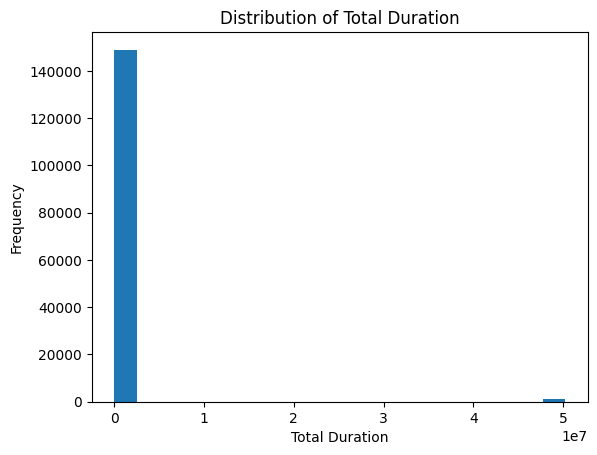

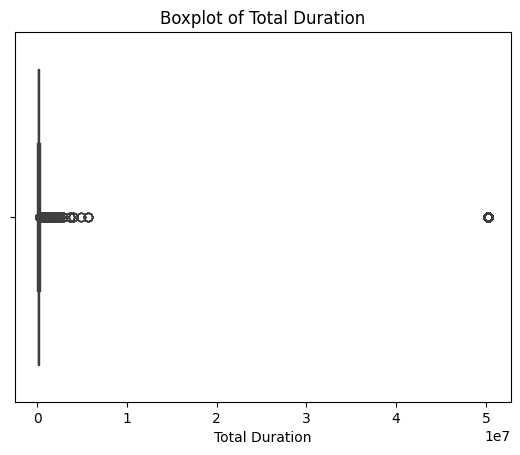

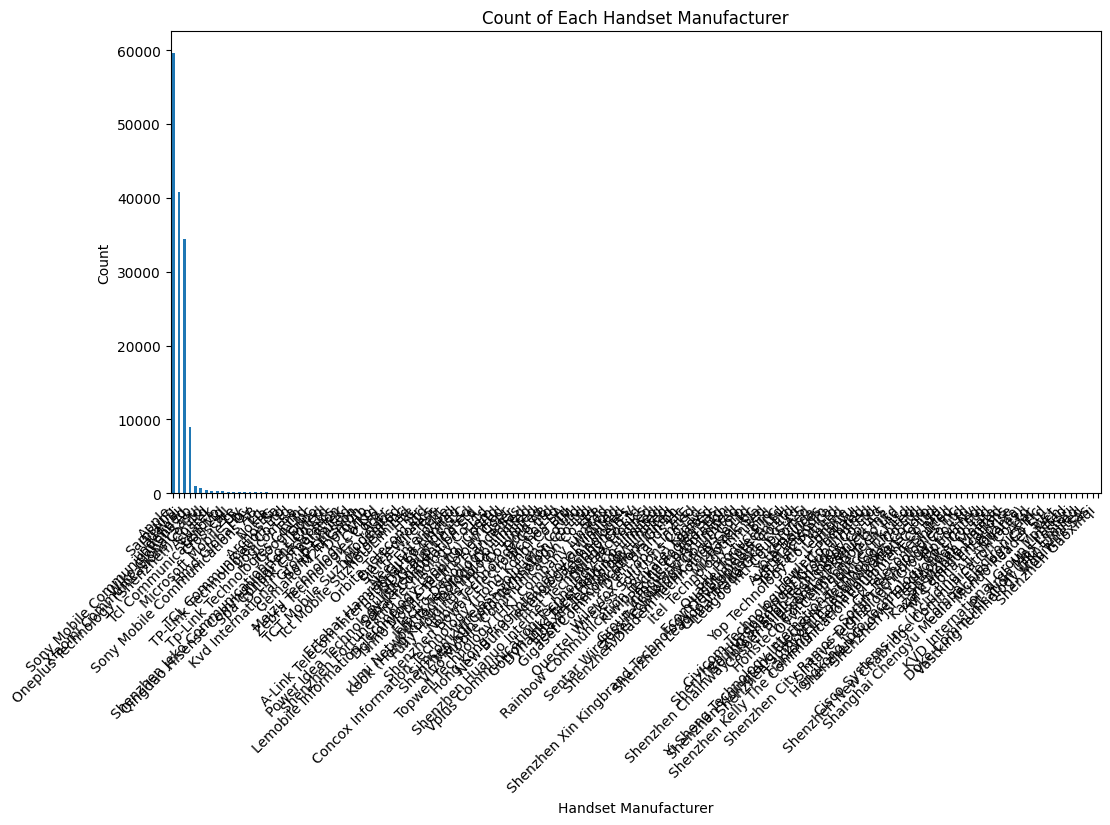

In [20]:
# Graphical Univariate Analysis: Identify suitable plotting options and plot. 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.decomposition import PCA

# Histogram for Total_Duration
plt.hist(df['Total_Duration'], bins=20)
plt.title('Distribution of Total Duration')
plt.xlabel('Total Duration')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Total_Duration
sns.boxplot(x=df['Total_Duration'])
plt.title('Boxplot of Total Duration')
plt.xlabel('Total Duration')
plt.show()

# Bar Chart for Handset Manufacturer
import plotly.express as px

# Create a bar chart for Handset Manufacturer
fig = px.bar(df['Handset Manufacturer'].value_counts().reset_index(),
             x='index', y='Handset Manufacturer',
             title='Count of Each Handset Manufacturer',
             labels={'index': 'Handset Manufacturer', 'Handset Manufacturer': 'Count'})

# Update layout for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()




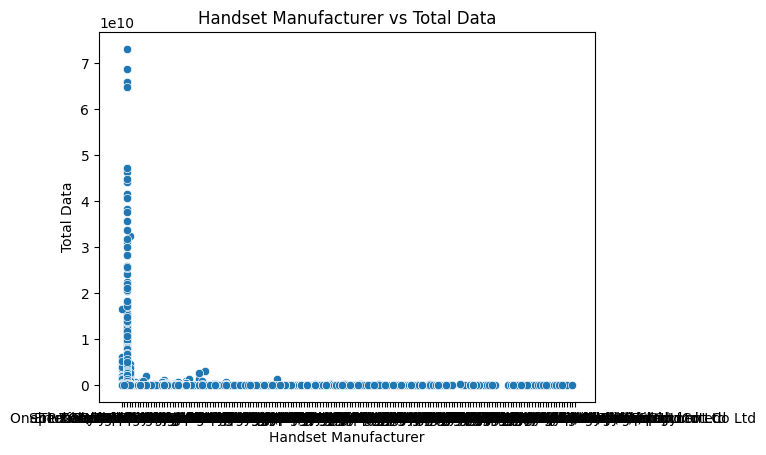

                Total_Data  Total_Duration
Total_Data        1.000000       -0.010331
Total_Duration   -0.010331        1.000000


In [15]:
# Bivariate Analysis: Explore the relationship between each application and the total DL+UL data.
# Scatter plot for each application vs total data
sns.scatterplot(x='Handset Manufacturer', y='Total_Data', data=df)
plt.title('Handset Manufacturer vs Total Data')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Total Data')
plt.show()

# Calculate correlation
correlation = df[['Total_Data', 'Total_Duration']].corr()
print(correlation)


                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000000   
Email DL (Bytes)                        0.004745          -0.000039   
Youtube DL (Bytes)                     -0.001389           0.001760   
Netflix DL (Bytes)                     -0.001817           0.000548   
Gaming DL (Bytes)                       0.001018          -0.001421   
Other DL (Bytes)                        0.006126          -0.002557   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004745           -0.001389   
Google DL (Bytes)               -0.000039            0.001760   
Email DL (Bytes)                 1.000000            0.001679   
Youtube DL (Bytes)               0.001679            1.000000   
Netflix DL (Bytes)               0.001351            0.001202   
Gaming DL (Bytes)                0.000050

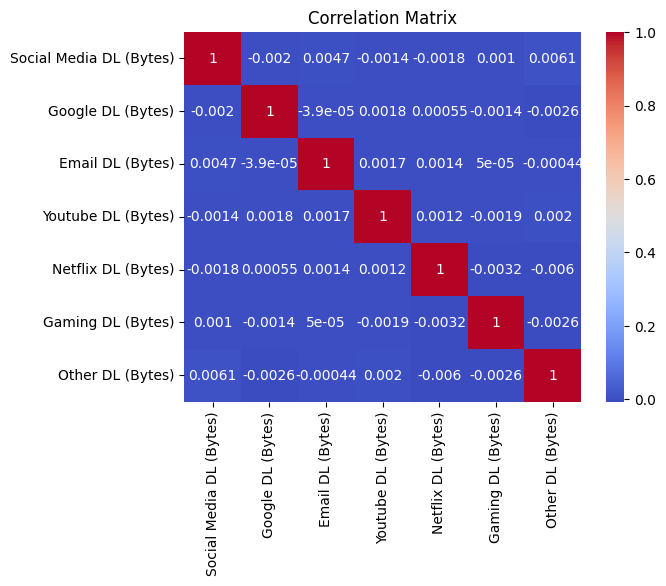

In [18]:
# Correlation Analysis: Compute a correlation matrix for the given variables.

# Select relevant columns for correlation analysis
correlation_data = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 
                       'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


[0.14439453 0.14355429]


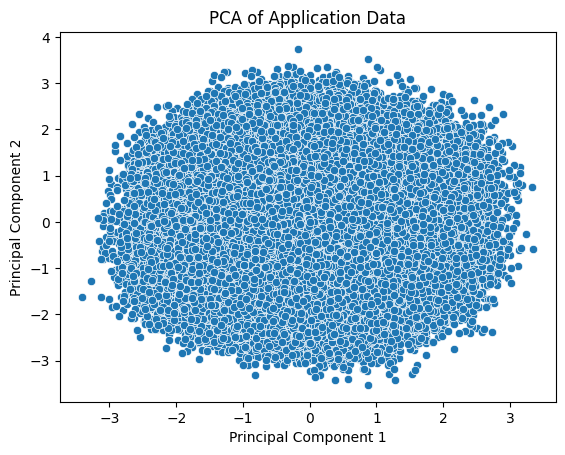

In [19]:
# Dimensionality Reduction
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(correlation_data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the explained variance ratio
print(pca.explained_variance_ratio_)

# Scatter plot of the principal components
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
plt.title('PCA of Application Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
